In [1]:
from preprocess import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

sns.set_style('whitegrid')

In [6]:
df1 = pd.read_csv('data/document_characterisation_aicore_initial.csv')

In [7]:
df2 = pd.read_csv('data/DocumentDump.csv')

In [8]:
# drop rows with bad url links
df2 = df2[df2['URL'].str.startswith('http')]

In [9]:
df2.head()

,URL,CLASS
0,https://issafrica.org/iss-today/time-to-tackle...,Analytical Report
1,http://www.understandingwar.org/backgrounder/r...,Analytical Report
2,http://www.understandingwar.org/backgrounder/r...,Analytical Report
3,http://www.understandingwar.org/backgrounder/w...,Analytical Report
4,http://www.understandingwar.org/backgrounder/r...,Analytical Report


In [10]:
df2.columns = ['url', 'class_label']

In [11]:
mapper = {
    'Incident Report': 0,
    'Situation Report': 1,
    'Profile Report': 2,
    'Analytical Report': 3
}

In [12]:
df2['class_id'] = df2['class_label'].map(mapper)
df1['class_label'][df1['class_label']=='Report'] = 'Profile Report'

In [13]:
df3 = pd.read_csv('data/public_urls.txt', sep='\n', header=None, names=['url', 'class_id'])
df3['class_id'] = 3
df3['class_label'] = 'Analytical Report'
df3.head()

,url,class_id,class_label
0,https://www.csis.org/analysis/chronology-possi...,3,Analytical Report
1,https://www.csis.org/analysis/reintroducing-am...,3,Analytical Report
2,https://www.csis.org/analysis/us-japan-allianc...,3,Analytical Report
3,https://www.csis.org/analysis/battle-mekelle-a...,3,Analytical Report
4,https://www.longwarjournal.org/archives/2020/1...,3,Analytical Report


In [14]:
print(len(df1), len(df2), len(df3))

60 117 27


In [15]:
df = pd.concat([df1, df2, df3], axis=0, join='outer', ignore_index=True)
print(len(df))
print(df['class_label'].value_counts())
df.tail(40)

204
Profile Report       100
Analytical Report     50
Situation Report      29
Incident Report       25
Name: class_label, dtype: int64


,url,class_label,class_id
164,https://rewardsforjustice.net/english/murat_ka...,Profile Report,2
165,https://rewardsforjustice.net/english/hamad_el...,Profile Report,2
166,https://rewardsforjustice.net/english/fuad_kha...,Profile Report,2
167,https://rewardsforjustice.net/english/bashir_m...,Profile Report,2
168,https://rewardsforjustice.net/english/mohamed_...,Profile Report,2
169,https://rewardsforjustice.net/english/abu_al_m...,Profile Report,2
170,https://rewardsforjustice.net/english/jehad_mo...,Profile Report,2
171,https://rewardsforjustice.net/english/ahmad_al...,Profile Report,2
172,https://rewardsforjustice.net/english/muhammad...,Profile Report,2
173,https://rewardsforjustice.net/english/abdelkar...,Profile Report,2


In [16]:
# hide
# scrape texts from urls and save in the given directory
# bad_url = url_to_file(df, 'url', './data/text/')       

# Then hand scrape the rest with the bad_url

In [17]:
df['text'] = None
df = add_text_to_df('./data/text/', df, 'text')

In [18]:
df = text_to_df('data/0/', df, col_names=['text', 'class_id'])
df = text_to_df('data/1/', df, col_names=['text', 'class_id'])
df = text_to_df('data/3/', df, col_names=['text', 'class_id'])


In [19]:
mapper = {
    0: 'Incident Report',
    1: 'Situation Report',
    2: 'Profile Report',
    3: 'Analytical Report'
}
df['class_label'] = df['class_id'].map(mapper)
df['class_label'].value_counts()

Profile Report       100
Situation Report      99
Incident Report       88
Analytical Report     74
Name: class_label, dtype: int64

In [20]:
with open('data.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
with open('data.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [3]:
df = tokenize_ft_extraction(df, 'text')

In [4]:
df.head()

,url,class_label,class_id,text,ents_rep,vocab,ppo_rep,no_ents_text,lem_text,len,org_count,place_count,time_count,person_count,num_count,ne_count
0,https://www.nytimes.com/2020/08/17/world/afric...,Incident Report,0,advertisement supported by the extremist group...,1.5,0.471761,1.71875,advertisement supported by the extremist group...,"[advertisement, support, by, the, extremist, g...",688,0.033430,0.031977,0.021802,0.014535,0.011628,0.079942
1,https://www.bbc.com/news/world-europe-54500555,Incident Report,0,belarusian riot police have used water cannon ...,1.45455,0.49208,1.55769,riot police have used water cannon and stun gr...,"[NORP, riot, police, have, use, water, cannon,...",1094,0.018282,0.017367,0.014625,0.038391,0.011883,0.074040
2,https://www.aljazeera.com/news/2020/10/12/nago...,Incident Report,0,russian foreign minister calls on armenia and ...,2.25352,0.33425,2.62245,foreign minister calls on and to adhere to agr...,"[NORP, foreign, minister, call, on, GPE, and, ...",2195,0.037358,0.052847,0.018679,0.026879,0.009567,0.117084
3,https://counteriedreport.com/roadside-bomb-bla...,Incident Report,0,alshabaab ended 2019 with a truckborne improvi...,1.22222,0.712418,1.5,ended with a truckborne improvised explosive d...,"[GPE, end, DATE, with, a, truckborne, improvis...",168,0.017857,0.017857,0.011905,0.000000,0.017857,0.035714
4,https://counteriedreport.com/al-shabaabs-impro...,Incident Report,0,alshabaab ended 2019 with a truckborne improvi...,1.22222,0.712418,1.5,ended with a truckborne improvised explosive d...,"[GPE, end, DATE, with, a, truckborne, improvis...",168,0.017857,0.017857,0.011905,0.000000,0.017857,0.035714


In [5]:
# Manually fill out null 
df['ppo_rep'][df['ppo_rep'].isnull()] = 2

In [14]:
# Trying out TfIDF with LDA.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
corpus = df['no_ents_text'].to_list()
vectorizer = TfidfVectorizer()
dt_matrix = vectorizer.fit_transform(corpus)

lda = LatentDirichletAllocation(n_components=6)
fitted = lda.fit_transform(dt_matrix)

terms = vectorizer.get_feature_names()

for i, comp in enumerate(lda.components_):
    comp_terms = zip(terms, comp)
    sorted_terms = sorted(comp_terms, key=lambda x: x[1], reverse=True)[:10]
    
    print("Concept {}".format(i))
    for term in sorted_terms:
        print(term[0])
        
    print()


Concept 0
daud
conveying
lokojaabuja
pedestrians
rammed
tricycle
flames
rescuing
oncoming
burnt

Concept 1
backpack
asymptomatic
mailbox
rcmp
defuse
suitcase
lane
explodes
caller
powder

Concept 2
pigeon
racing
auction
pigeons
kim
asymptomatic
breeder
fetches
winnings
exorbitant

Concept 3
bribe
20000
eur
bribes
roadeks
firmaslv
leta
businesspersons
accepting
brokaled

Concept 4
the
in
of
and
to
on
for
that
was
is

Concept 5
gazetauz
pneumonia
1035
cau
neighbourhoods
oltinkol
shahrikhon
msed
davo
oluwatosin



In [17]:
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, dt_matrix, vectorizer)

/Users/luluo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x             y  topics  cluster       Freq
topic                                                    
4      0.079851  2.324505e-08       1        1  93.252228
5     -0.016067 -1.365423e-04       2        1   1.398347
0     -0.016068  1.512398e-04       3        1   1.392281
2     -0.015923 -8.919715e-06       4        1   1.325431
3     -0.015918 -6.519473e-06       5        1   1.324502
1     -0.015875  7.184327e-07       6        1   1.307211, topic_info=            Term       Freq      Total Category  logprob  loglift
18295        the  59.000000  59.000000  Default   30.000  30.0000
7412        fire   1.000000   1.000000  Default   29.000  29.0000
15984       same   1.000000   1.000000  Default   28.000  28.0000
16272     seized   1.000000   1.000000  Default   27.000  27.0000
9560      inside   1.000000   1.000000  Default   26.000  26.0000
...          ...        ...        ...      ...      ...      ...
16683   sidewalk   0.002708   0.170497   Topic6   -9.921   0.1949
2973   briefcase   0.002708   0.164028   Topic6   -9.921   0.2335
15695    roadeks   0.002708   0.147781   Topic6   -9.921   0.3378
10667       leta   0.002708   0.147781   Topic6   -9.921   0.3378
7433    firmaslv   0.002708   0.147781   Topic6   -9.921   0.3378

[1228 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
702        1  0.962860  across
939        1  0.928937  agency
1373       1  0.961112  always
1446       1  1.074270      an
1487       1  1.001043     and
...      ...       ...     ...
19945      1  0.966182    went
19947      1  0.993774    were
20078      1  0.988554    with
20105      1  0.961025   women
20125      1  0.962723    work

[62 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 1, 3, 4, 2])

The above analysis has not shown a clear pathway to classify the documents.

Average length of documents: 1152.7202216066482
Median length of documents: 670.0


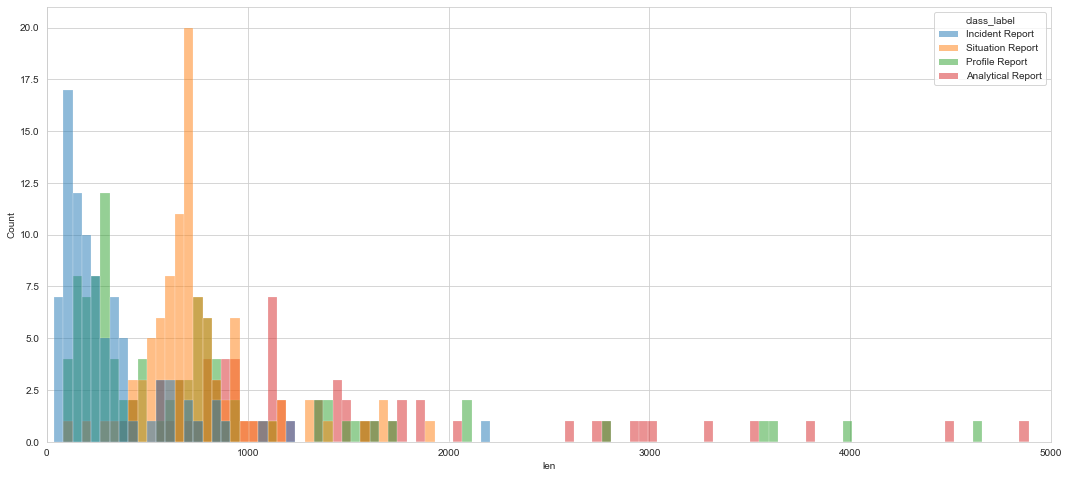

In [4]:
plt.figure(figsize=(18,8))
sns.histplot(df, x='len', hue='class_label', bins=500)
plt.xlim((0, 5000))
print('Average length of documents:', df['len'].mean())
print('Median length of documents:', df['len'].median())

Text(0.5, 1.0, 'Length of text by report type')

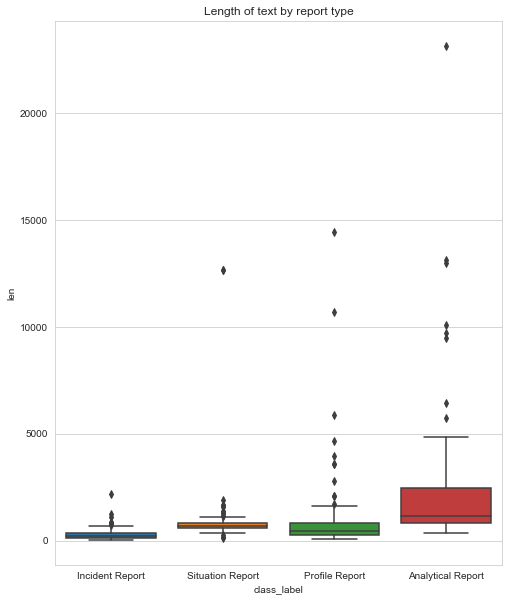

In [5]:
plt.figure(figsize=(8,10))
sns.boxplot(data=df, x='class_label', y='len')
plt.title('Length of text by report type')

<AxesSubplot:xlabel='class_label', ylabel='ppo_rep'>

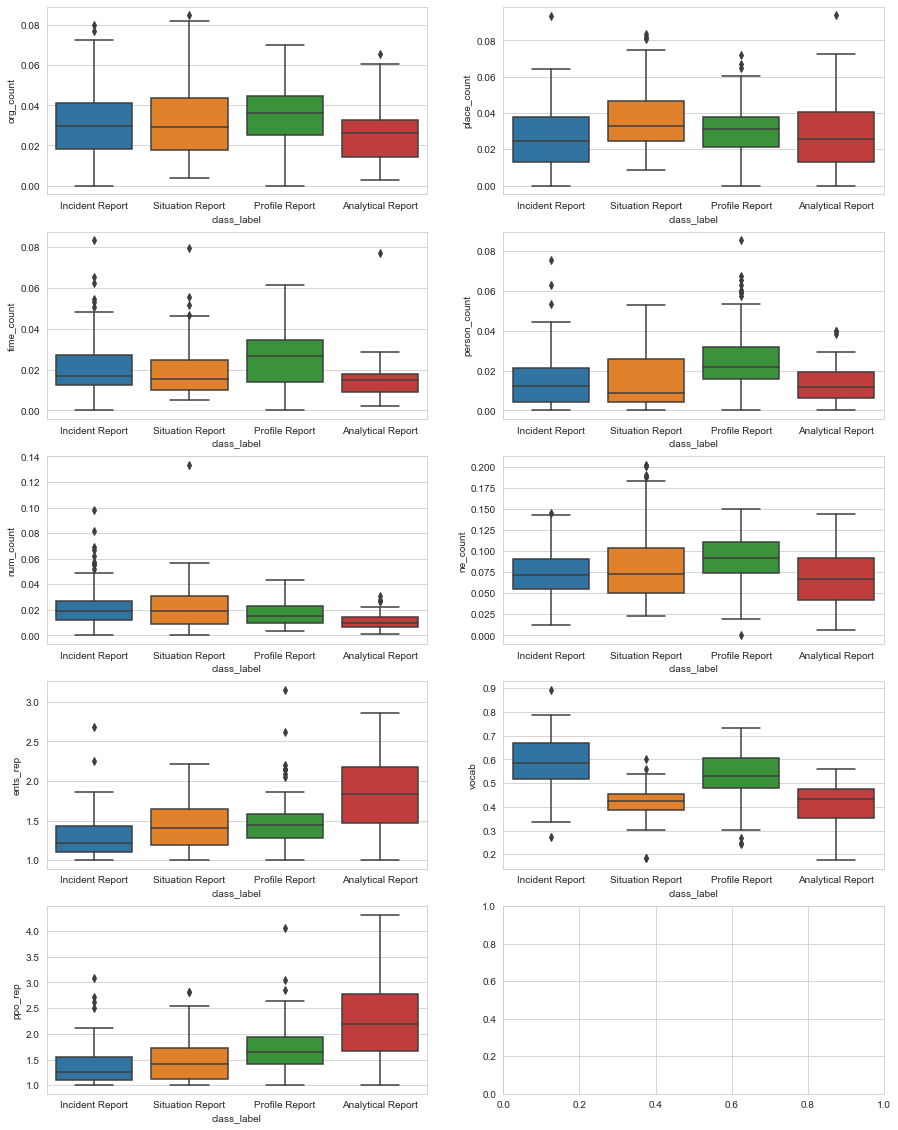

In [5]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
sns.boxplot(data=df, x='class_label', y='org_count', ax=axs[0][0])
sns.boxplot(data=df, x='class_label', y='place_count', ax=axs[0][1])
sns.boxplot(data=df, x='class_label', y='time_count', ax=axs[1][0])
sns.boxplot(data=df, x='class_label', y='person_count', ax=axs[1][1])
sns.boxplot(data=df, x='class_label', y='num_count', ax=axs[2][0])
sns.boxplot(data=df, x='class_label', y='ne_count', ax=axs[2][1])
sns.boxplot(data=df, x='class_label', y='ents_rep', ax=axs[3][0])
sns.boxplot(data=df, x='class_label', y='vocab', ax=axs[3][1])
sns.boxplot(data=df, x='class_label', y='ppo_rep', ax=axs[4][0])



### The iterative process:
Random forest -> Study misclassified -> Feature extraction -> Random forest ->...</n>
Fit models using: </n>
```python
from sklearn.model_selection import train_test_split
X = df[list of features]
y = df['class_label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)
cls_names = ['Incident Report', 'Situation Report', 'Profile report', 'Analytical report']
rf = RandomForestClassifier(n_estimators=100, max_features=0.8, min_sample_leaf=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print(classification_report(y_val, y_pred, target_names=cls_names))
print(confusion_matrix(y_val, y_pred))
```
* First fit 'len', 'org_count', 'place_count', 'time_count', 'person_count', 'num_count' </n>
Result:
```python
Train:                    precision    recall  f1-score   support

  Incident Report       0.97      0.98      0.97        59
 Situation Report       0.96      0.99      0.97        70
   Profile report       0.99      0.99      0.99        80
Analytical report       0.99      0.95      0.97        79

         accuracy                           0.98       288
        macro avg       0.97      0.98      0.98       288
     weighted avg       0.98      0.98      0.98       288

Validation:                    precision    recall  f1-score   support

  Incident Report       0.67      0.67      0.67        15
 Situation Report       0.76      0.72      0.74        18
   Profile report       0.68      0.75      0.71        20
Analytical report       0.84      0.80      0.82        20

         accuracy                           0.74        73
        macro avg       0.74      0.73      0.74        73
     weighted avg       0.74      0.74      0.74        73

[[10  1  1  3]
 [ 0 13  5  0]
 [ 2  3 15  0]
 [ 3  0  1 16]]
 ```
Looks like the model is on the way to something good. But not good yet. Notice the model confuses incident report with analytical report, and also with situation report with profile report. 
 ```python
y_pred = rf.predict(X)
compare = pd.DataFrame(y[y_pred!=y])
compare['pred_label'] = y_pred[y_pred!=y]
print(f'{len(compare)} misclassified')
print(compare)
26 misclassified
           class_label         pred_label
2      Incident Report  Analytical Report
17    Situation Report     Profile Report
24    Situation Report    Incident Report
53   Analytical Report   Situation Report
54   Analytical Report     Profile Report
57   Analytical Report   Situation Report
81    Situation Report  Analytical Report
96      Profile Report  Analytical Report
101     Profile Report  Analytical Report
109     Profile Report  Analytical Report
140     Profile Report    Incident Report
148     Profile Report    Incident Report
164     Profile Report    Incident Report
183  Analytical Report   Situation Report
202  Analytical Report   Situation Report
212    Incident Report     Profile Report
216    Incident Report     Profile Report
234    Incident Report     Profile Report
248    Incident Report     Profile Report
259    Incident Report     Profile Report
267   Situation Report    Incident Report
273   Situation Report     Profile Report
281   Situation Report  Analytical Report
307   Situation Report  Analytical Report
329   Situation Report    Incident Report
337  Analytical Report    Incident Report
```
Looking at instances of misclassification, I have the following thoughts: </n>
 1. incident report and analytical report maybe separated better using feature(s) of repeated NE. </n>
 2. feature(s) of vocabulary could be useful to separate out analytical report. </n>
 3. some information in other tags are not captured (header, strong, etc.), need to update scraper. </n>
 
A worrying observation is that when validation set is randomly reshuffled, the validation score will vary a large amount, up to 15-20%. Whereas same validaiton set, reinstantiate new models will result in stable constant score. There is a concern whether the dataset is too small for such classification. However, we will still try to improve validation score using the above approaches. </n>

* Second, fix the scraper to include all texts not just texts in paragraphs and include 3 more features: average number of repeats for entities, average number of repeats for entities of places, people and organisations, normalised vocabulary count. </n>

```python

Train:                    precision    recall  f1-score   support

  Incident Report       0.98      1.00      0.99        59
 Situation Report       0.99      1.00      0.99        70
   Profile report       1.00      1.00      1.00        80
Analytical report       1.00      0.97      0.99        79

         accuracy                           0.99       288
        macro avg       0.99      0.99      0.99       288
     weighted avg       0.99      0.99      0.99       288

Validation:                    precision    recall  f1-score   support

  Incident Report       0.83      0.67      0.74        15
 Situation Report       0.72      0.72      0.72        18
   Profile report       0.73      0.80      0.76        20
Analytical report       0.90      0.95      0.93        20

         accuracy                           0.79        73
        macro avg       0.80      0.78      0.79        73
     weighted avg       0.80      0.79      0.79        73

[[10  2  2  1]
 [ 0 13  4  1]
 [ 1  3 16  0]
 [ 1  0  0 19]]

17 misclassified
           class_label         pred_label
24    Situation Report    Incident Report
48   Analytical Report    Incident Report
53   Analytical Report     Profile Report
75    Situation Report  Analytical Report
81    Situation Report  Analytical Report
86     Incident Report   Situation Report
96      Profile Report  Analytical Report
140     Profile Report    Incident Report
148     Profile Report    Incident Report
164     Profile Report    Incident Report
178  Analytical Report     Profile Report
202  Analytical Report   Situation Report
212    Incident Report     Profile Report
234    Incident Report     Profile Report
248    Incident Report     Profile Report
259    Incident Report     Profile Report
337  Analytical Report    Incident Report
 ```

 There is a great improvement in classifying analytical reports. However, situation report and profile report may have suffered slightly. </n>

 Comparing the misclassification lists. The common ones are: 24 s-i, 53 a-p, 81 s-a, 96 p-a, 140 p-i, 148 p-i, 164 p-i, 202 a-s, 212 i-p, 234 i-p, 248 i-p, 259 i-p, 337 a-i. The most common misclassifications are between incident reports and profile reports. Those two classes use slightly different vocabularies. So next step we are looking at feature(s) that could possibly represent different writing styles(?). Before jumping into deep learning models, I want to look at these techniques: </n>

 1. TF-IDF: stands for Term Frequency - Inverse Document Frequency. We could use the most frequently appeared words in each category to capture some features? We perhaps want to ignore all named entities to capture not the subject but how articles are written. </n>

 2. LDA. Latent Dirichlet Allocation. I am aware of the fact we are not trying to categorise by content or concept but how articles are written. However some visualisation might prove useful to find some features. </n>

From the output and visualisation of TF-IDF and LDA, there doesn't seem to be a clear path to successful classification. This exploration stop here. We are going to explore other avenues. 


In [19]:
X = df[['len', 'org_count', 'place_count', 'time_count', 'person_count', 'num_count', 'ents_rep', 'vocab', 'ppo_rep']]
y = df['class_label']
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.2, stratify=y, random_state=2020)


/Users/luluo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
cls_names = ['Incident Report', 'Situation Report', 'Profile report', 'Analytical report']
rf = RandomForestClassifier(
    n_estimators=500, 
    max_features=0.8, 
    # max_depth=10, 
    min_samples_leaf=2,
    random_state=2020
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print('Train:', classification_report(y_train, rf.predict(X_train), target_names=cls_names))
print('Validation:', classification_report(y_val, y_pred, target_names=cls_names))
print(confusion_matrix(y_val, y_pred))

/Users/luluo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Train:                    precision    recall  f1-score   support

  Incident Report       0.98      1.00      0.99        59
 Situation Report       0.99      1.00      0.99        70
   Profile report       1.00      1.00      1.00        80
Analytical report       1.00      0.97      0.99        79

         accuracy                           0.99       288
        macro avg       0.99      0.99      0.99       288
     weighted avg       0.99      0.99      0.99       288

Validation:                    precision    recall  f1-score   support

  Incident Report       0.83      0.67      0.74        15
 Situation Report    

In [19]:
y_pred = rf.predict(X)
compare = pd.DataFrame(y[y_pred!=y])
compare['pred_label'] = y_pred[y_pred!=y]
print(f'{len(compare)} misclassified')
print(compare)

17 misclassified
           class_label         pred_label
24    Situation Report    Incident Report
48   Analytical Report    Incident Report
53   Analytical Report     Profile Report
75    Situation Report  Analytical Report
81    Situation Report  Analytical Report
86     Incident Report   Situation Report
96      Profile Report  Analytical Report
140     Profile Report    Incident Report
148     Profile Report    Incident Report
164     Profile Report    Incident Report
178  Analytical Report     Profile Report
202  Analytical Report   Situation Report
212    Incident Report     Profile Report
234    Incident Report     Profile Report
248    Incident Report     Profile Report
259    Incident Report     Profile Report
337  Analytical Report    Incident Report


In [45]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
scoring = {
    # 'accuracy' : make_scorer(accuracy_score), 
    # 'precision' : make_scorer(precision_score, average = 'micro'),
    # 'recall' : make_scorer(recall_score, average = 'micro'), 
    'f1_score' : make_scorer(f1_score, average='micro')
}
cv_result = cross_validate(rf, X, y, cv=10, scoring=scoring)


/Users/luluo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
print('F1 score:', cv_result['test_f1_score'])
print('Mean f1 score:', cv_result['test_f1_score'].mean())
print('F1 score standard deviation', cv_result['test_f1_score'].std()) 



F1 score: [0.78378378 0.66666667 0.5        0.66666667 0.86111111 0.91666667
 0.75       0.72222222 0.72222222 0.66666667]
Mean f1 score: 0.7256006006006006
F1 score standard deviation 0.10963030472284356
/Users/luluo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There is still a lot of variation in accuracy scores